In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install -U scikit-learn
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA

     |████████████████████████████████| 22.3MB 54.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
def process_data(data):
  pca = PCA(n_components = 2)
  return pca.fit_transform(data)

In [3]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

In [4]:
def plot_dataset(data, target = None):
  fig, ax = plt.subplots(1, figsize = (10, 10))
  ax.scatter(data[:, 0], data[:, 1], c = target, cmap = plt.cm.Set1, edgecolor = 'k')
  plt.xlabel('Первый признак')
  plt.ylabel('Второй признак')
  plt.show()

In [5]:
def execute_data(data):
  fig, ax = plt.subplots(4, 2, figsize = (20, 20))
  linkages = np.array(['single', 'complete', 'average', 'ward'])
  for linkage in linkages:
      i = np.where(linkages == linkage)[0][0]
      clf = AgglomerativeClustering(compute_distances = True, n_clusters = 3, linkage = linkage)
      y = clf.fit_predict(data)
      plot_dendrogram(clf, truncate_mode = 'level', p = 3, ax = ax[i, 0])
      ax[i, 1].scatter(data[:, 0], data[:, 1], c = y, cmap = plt.cm.Set1, edgecolor = 'k')
      ax[i, 0].set_yticks([])
      ax[i, 1].set(xlabel = 'Признак 1', ylabel = 'Признак 2')
  plt.tight_layout()
  plt.show()

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [7]:
X = process_data(X)

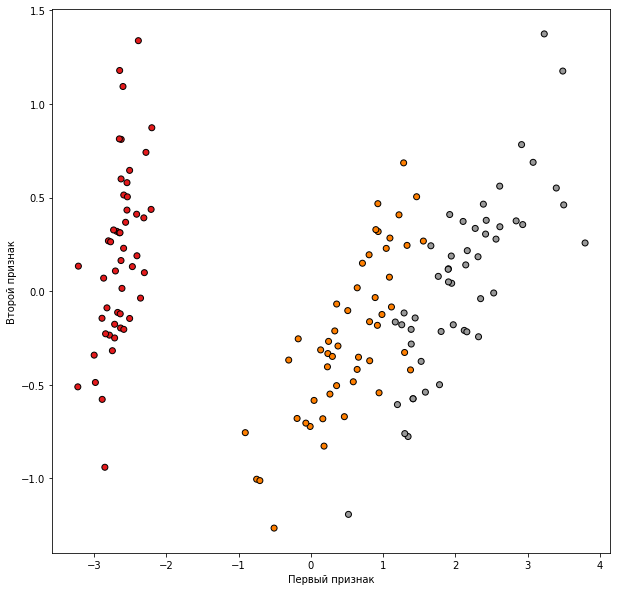

In [8]:
plot_dataset(X, y)

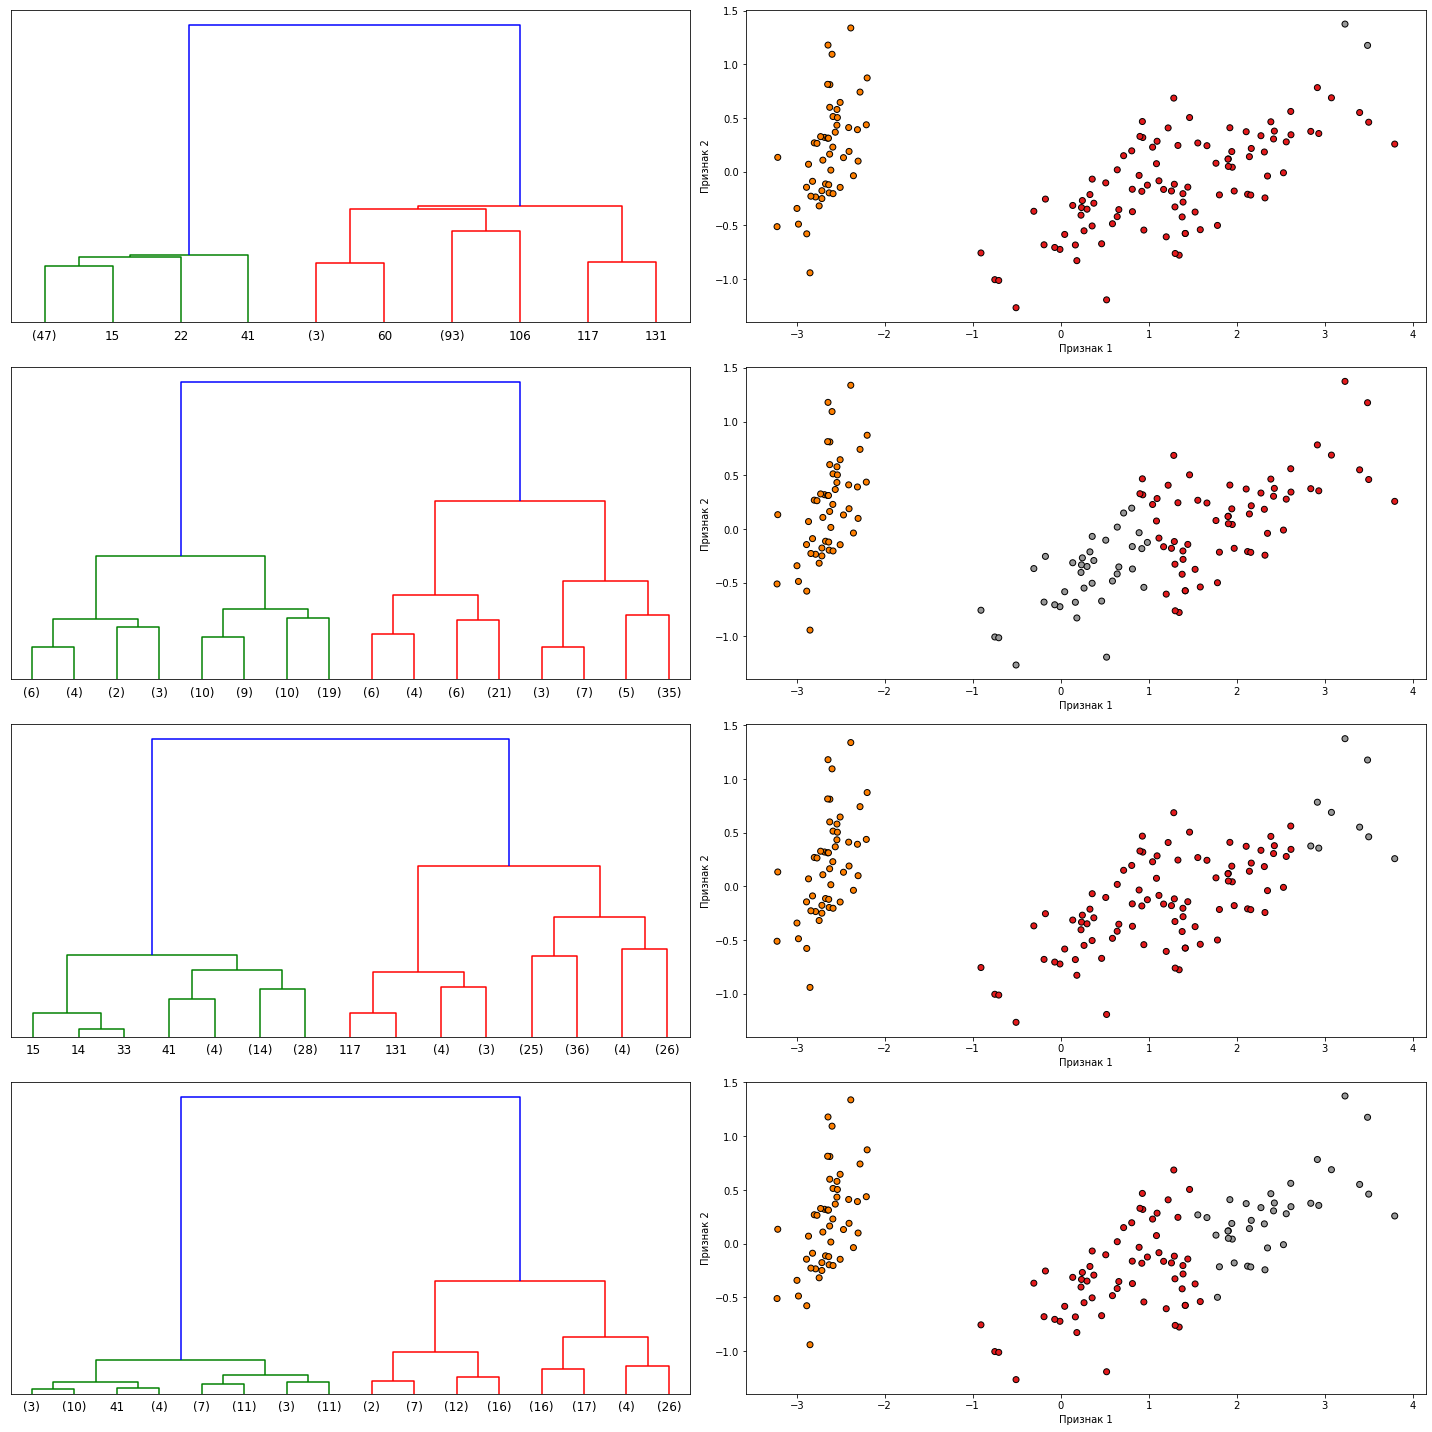

In [9]:
execute_data(X)